# 📌

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("wine-quality-white-and-red.csv")
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# 1. 데이터 분석

In [3]:
df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

* type: 레드와인인지 화이트 와인인지 구별
* fixed acidity: 고정산도
* volatile acidity: 휘발성 산도
* citric acid: 시트르산(구연산)
* residual sugar: 잔여당분
* chlorides: 염화물
* free sulfur dioxide: 자유 이산화황
* total sulfur dioxide: 총 이산화황
* density: 밀도
* pH: 산성도
* sulphates: 황산염
* alcohol: 알코올도수
* quality: 등급

In [4]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

null값은 없다

In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


<Axes: xlabel='type', ylabel='Count'>

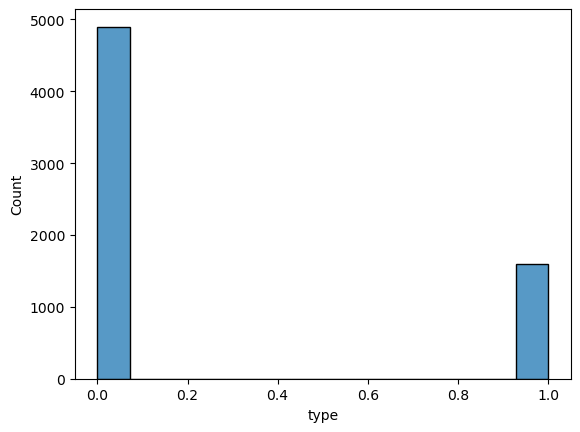

In [69]:
sns.histplot(df,x="type")

# 1.1 상관관계 분석

In [7]:
df["type"] = df["type"].replace({'white': 0, 'red': 1})
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,0,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,0,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,0,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,0,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,1,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,1,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6494,1,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,1,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [10]:
col=df.copy()
df_corr=col.corr()
df_corr

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
type,1.000000,0.486740,0.653036,-0.187397,-0.348821,0.512678,-0.471644,-0.700357,0.390645,0.329129,0.487218,-0.032970,-0.119323
fixed acidity,0.486740,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile acidity,0.653036,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric acid,-0.187397,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual sugar,-0.348821,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.512678,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free sulfur dioxide,-0.471644,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total sulfur dioxide,-0.700357,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.390645,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,0.329129,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506


<Axes: >

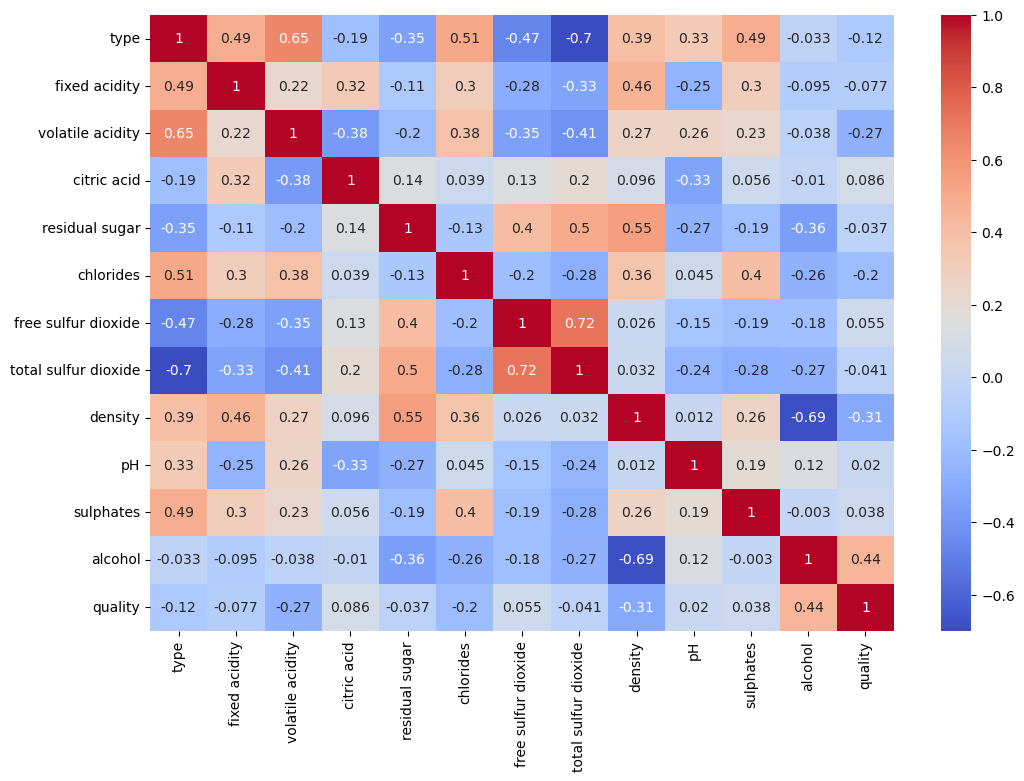

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(df_corr,cmap="coolwarm",annot=True)

In [12]:
'''type과 관련된 상관계수 살펴보기'''
df_type_corr=df_corr["type"]
df_type_corr

type                    1.000000
fixed acidity           0.486740
volatile acidity        0.653036
citric acid            -0.187397
residual sugar         -0.348821
chlorides               0.512678
free sulfur dioxide    -0.471644
total sulfur dioxide   -0.700357
density                 0.390645
pH                      0.329129
sulphates               0.487218
alcohol                -0.032970
quality                -0.119323
Name: type, dtype: float64

### 피어슨 상관계수 분석
-1.0 < r < -0.7 : 강한 음적 선형관계<br>
-0.7 < r < -0.3 : 뚜렷한 음적 선형관계<br>
-0.3 < r < -0.1 : 약한 음적 선형관계<br>
-0.1 < r < +0.1 : 거의 무시될 수 있는 선형관계<br>
+0.1 < r < +0.3 : 약한 양적 선형관계<br>
+0.3 < r < +0.7 : 뚜렷한 양적 선형관계<br>
+0.7 < r < +1.0 : 강한 양적 선형관계<br>


<BarContainer object of 13 artists>

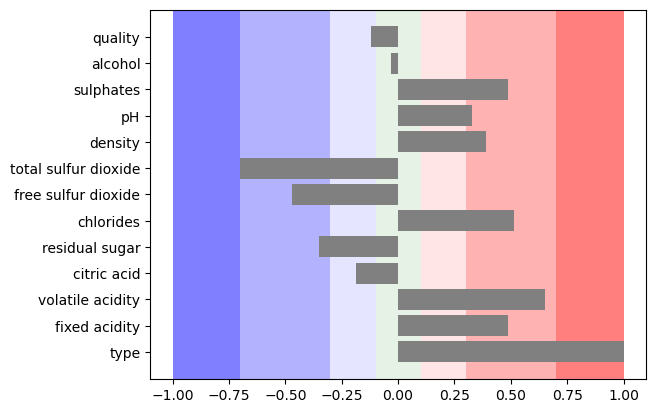

In [13]:
x=col.columns
y=df_type_corr.to_numpy()

plt.axvspan(-1,-0.7,alpha=0.5,facecolor='blue')
plt.axvspan(-0.7,-0.3,alpha=0.3,facecolor='blue')
plt.axvspan(-0.3,-0.1,alpha=0.1,facecolor='blue')
plt.axvspan(-0.1,+0.1,alpha=0.1,facecolor='green')
plt.axvspan(+0.1,+0.3,alpha=0.1,facecolor='red')
plt.axvspan(+0.3,+0.7,alpha=0.3,facecolor='red')
plt.axvspan(+0.7,+1.0,alpha=0.5,facecolor='red')
plt.barh(x,y,color='gray')

In [16]:
df_white=df[df["type"]==0]
df_red=df[df["type"]==1]

In [35]:
cols=df.columns[1:].tolist()
cols

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

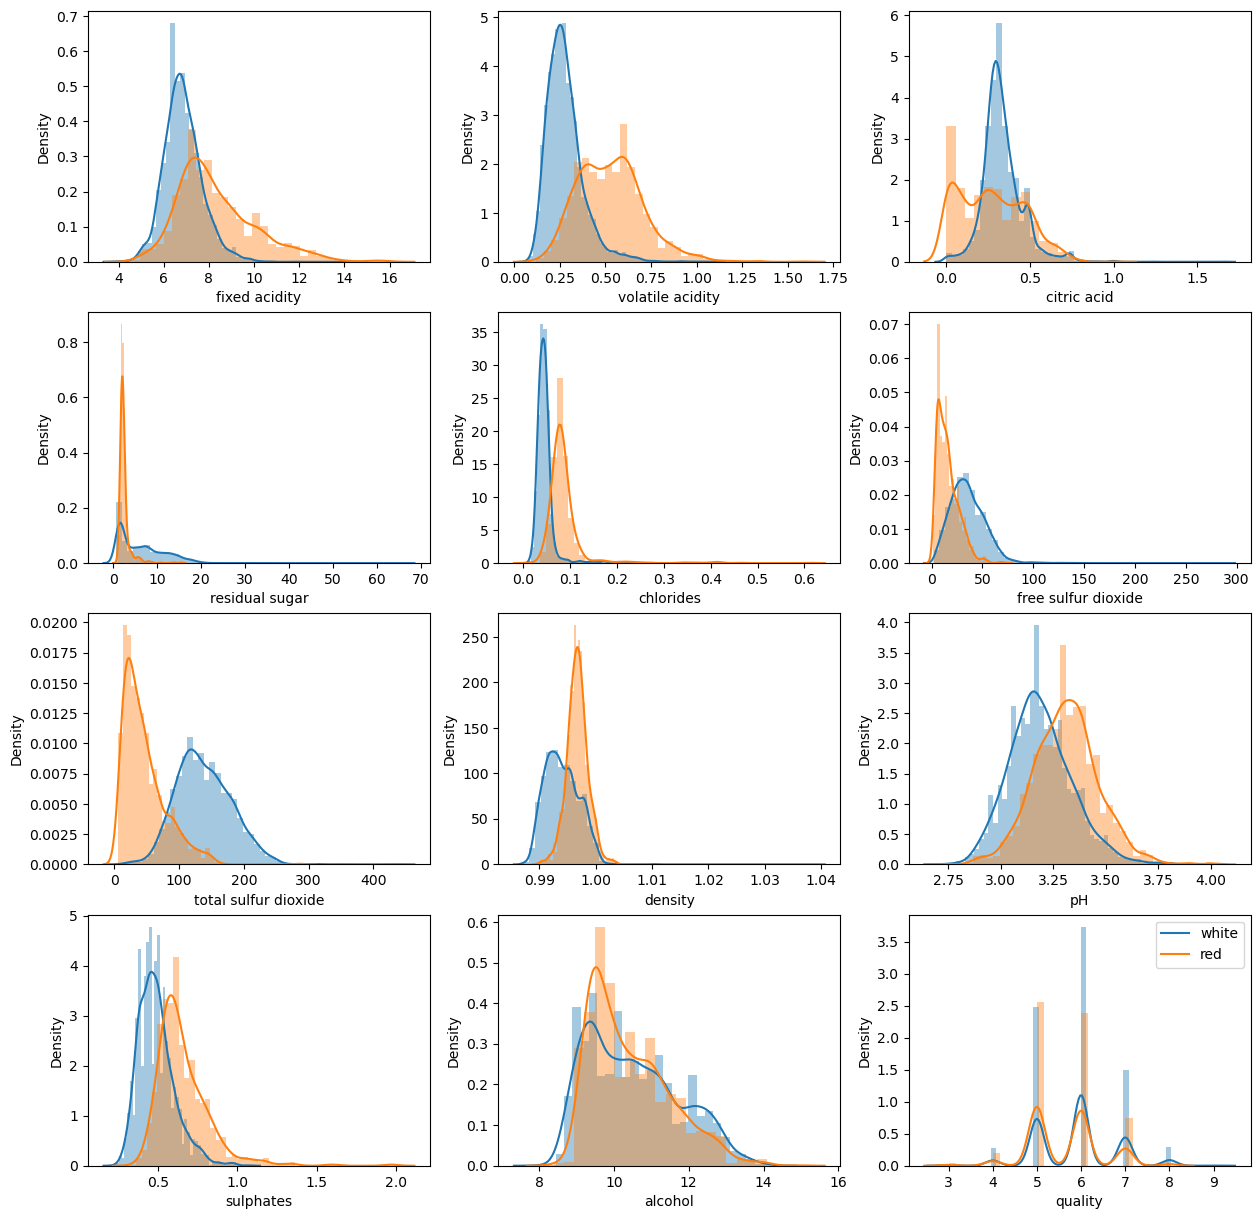

In [48]:
import warnings
warnings.filterwarnings('ignore')
fig, axes= plt.subplots(nrows=4,ncols=3,figsize=(15,15))

for i, col_name in enumerate(cols):
    row=i//3
    col=i%3
    sns.distplot(df_white[col_name],ax=axes[row][col])
    sns.distplot(df_red[col_name],ax=axes[row][col])
    plt.legend(labels=["white","red"])

<Axes: xlabel='total sulfur dioxide', ylabel='Count'>

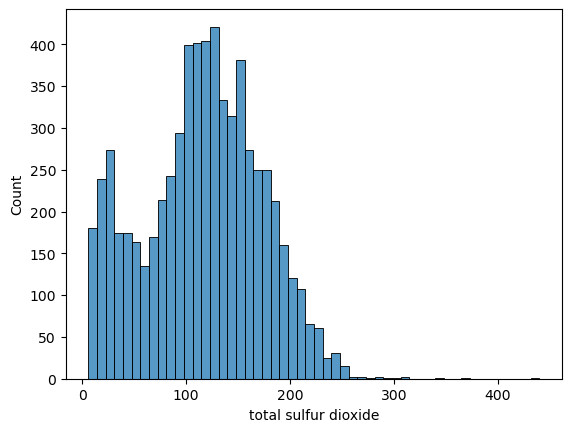

In [98]:
sns.histplot(df['total sulfur dioxide'])

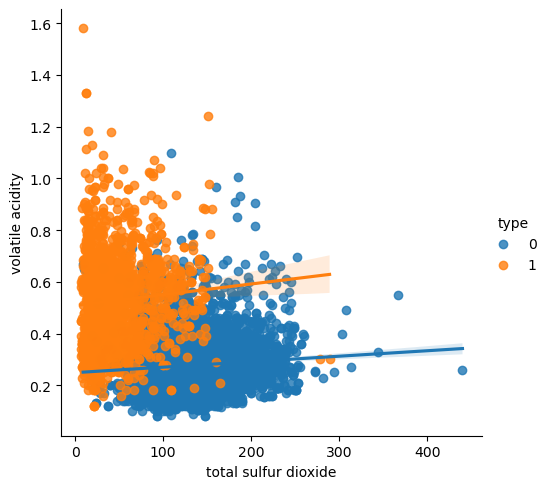

In [56]:
sns.lmplot(df,x="volatile acidity",y="total sulfur dioxide",hue="type")

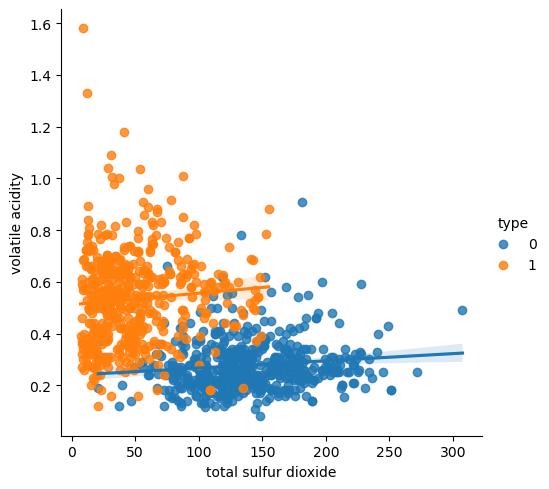

In [58]:
sampled_df = df.groupby('type').apply(lambda x: x.sample(n=min(len(x), 500))).reset_index(drop=True)
sns.lmplot(data=sampled_df, x="volatile acidity",y="total sulfur dioxide",hue="type")

In [60]:
df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

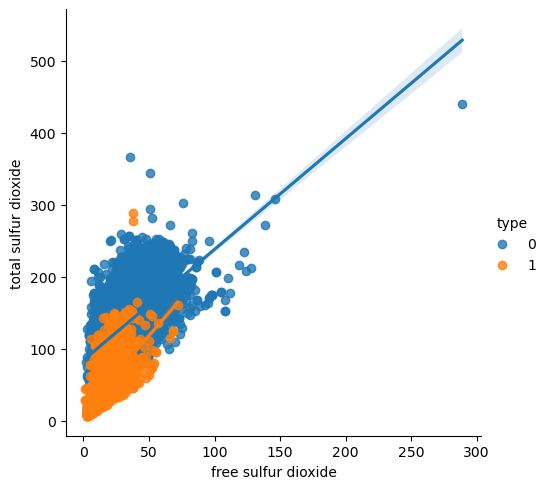

In [62]:
sns.lmplot(df,x="free sulfur dioxide",y="total sulfur dioxide",hue="type")

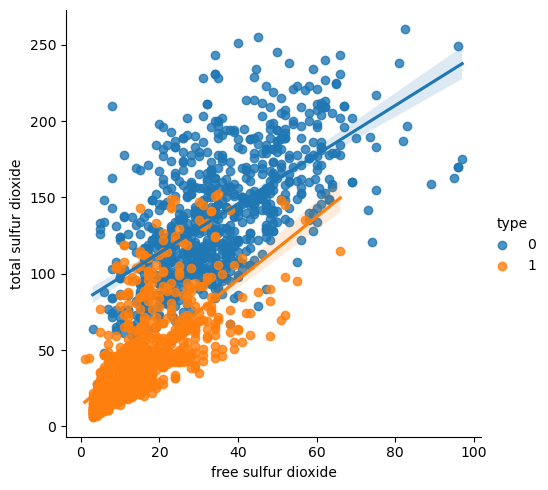

In [63]:
sampled_df = df.groupby('type').apply(lambda x: x.sample(n=min(len(x), 800))).reset_index(drop=True)
sns.lmplot(data=sampled_df, x="free sulfur dioxide",y="total sulfur dioxide",hue="type")

학습을 위해 white을 0, red를 1로 바꾼다.

In [70]:
X=df.iloc[:,1:]
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [71]:
y=df.iloc[:,0]
y

0       0
1       0
2       0
3       0
4       0
       ..
6492    1
6493    1
6494    1
6495    1
6496    1
Name: type, Length: 6497, dtype: int64

In [82]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

In [110]:
# 여기에 모델을 구현해 주세요.
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [111]:
# 위에서 만든 모델로 학습과 예측을 진행해 주세요.
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [112]:
y_predict=model.predict(X_test)
y_predict[:5]

array([0, 0, 0, 0, 1], dtype=int64)

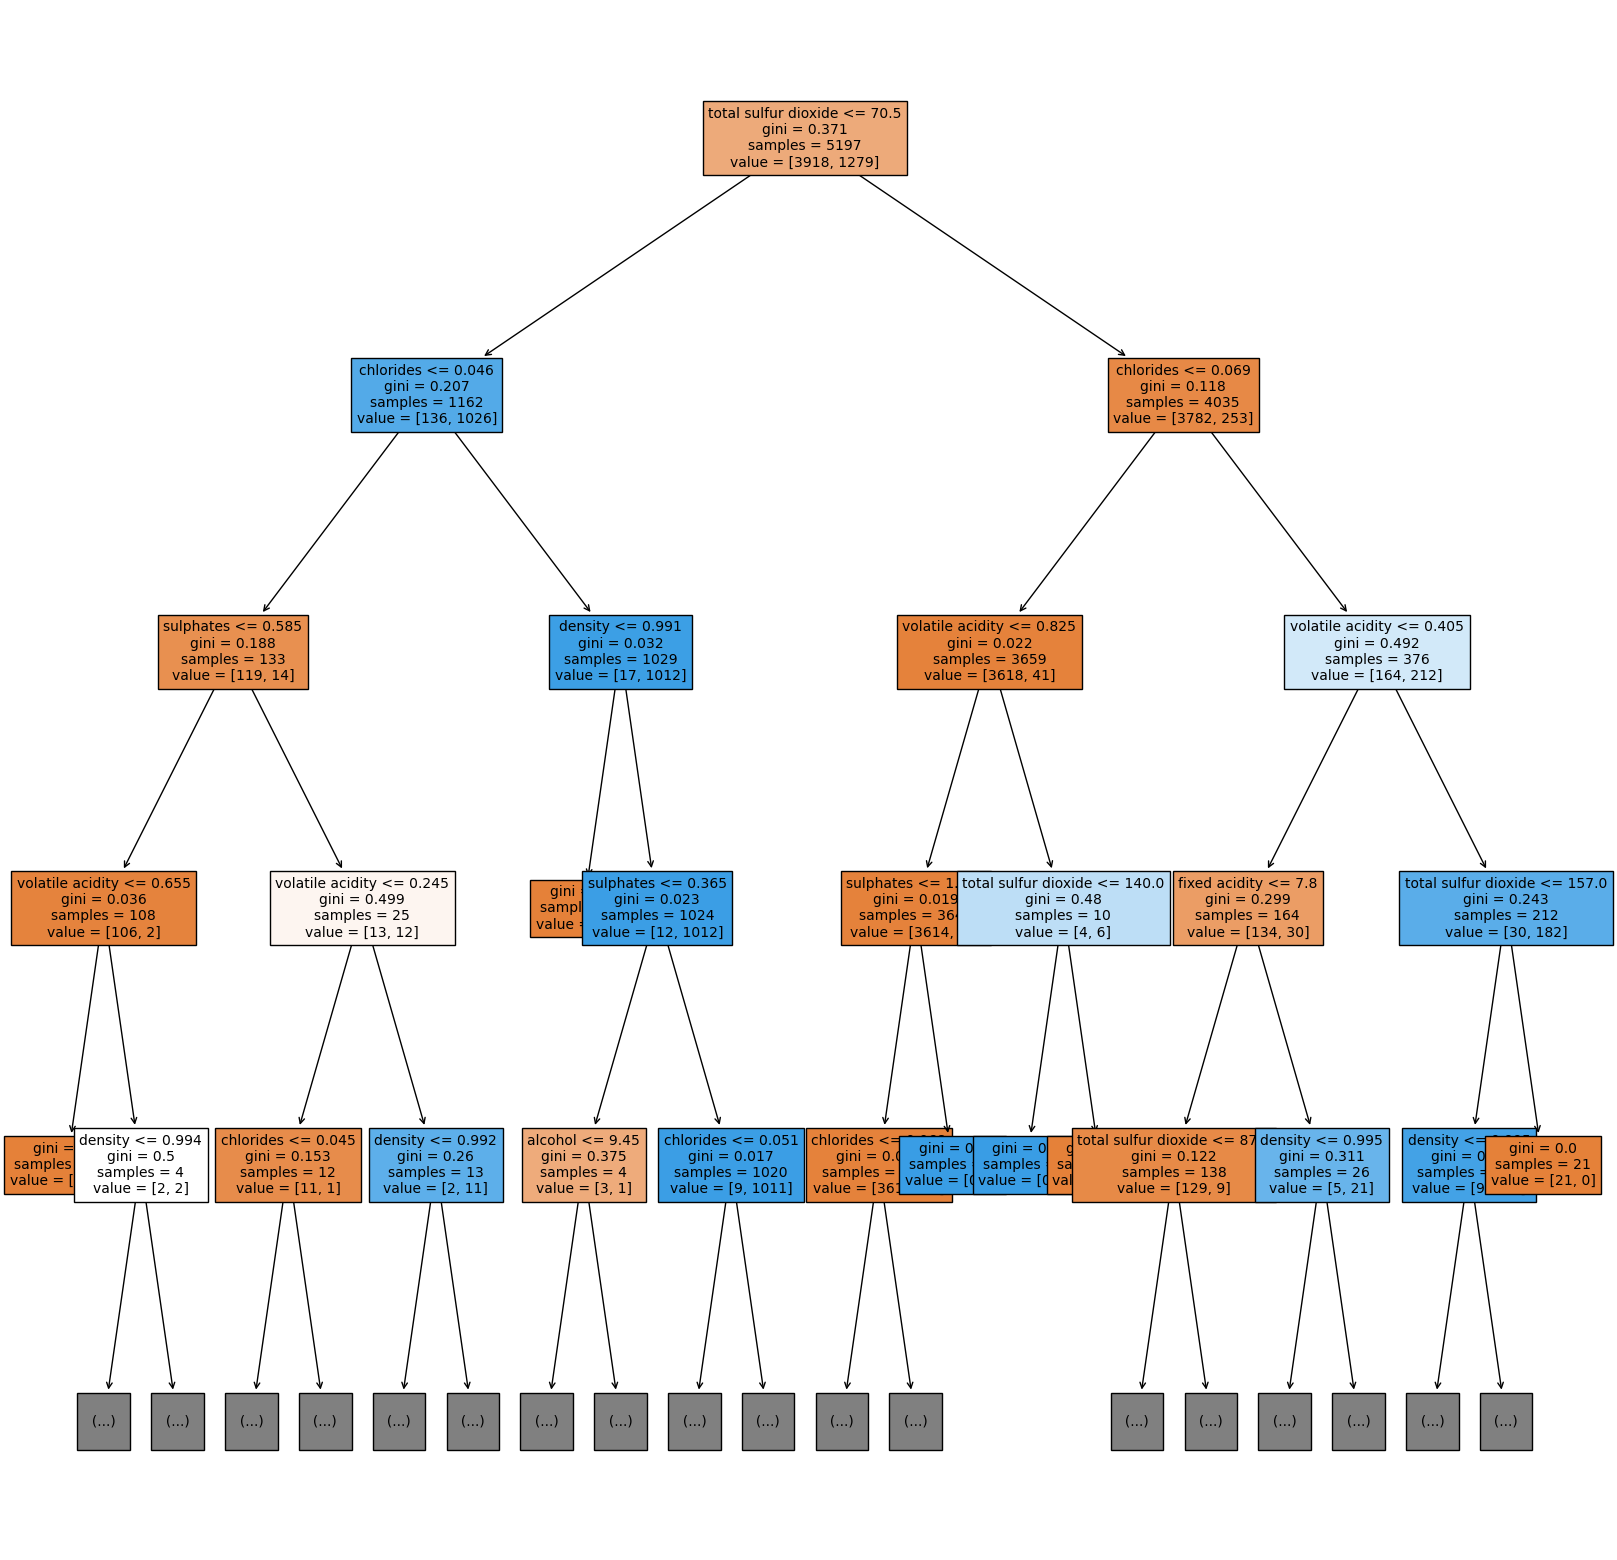

In [113]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 20))
tree = plot_tree(model,
                 feature_names=feature_names,
                 max_depth=4,
                 filled=True,
                 fontsize=10)

In [114]:
# feature의 중요도 추출하기
model.feature_importances_

array([0.01607649, 0.05542922, 0.0021455 , 0.00436157, 0.20986144,
       0.00645095, 0.66181109, 0.01594051, 0.00904999, 0.01571064,
       0.00217422, 0.00098839])

In [115]:
feature_names=df.columns[1:]
feature_names

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

<Axes: >

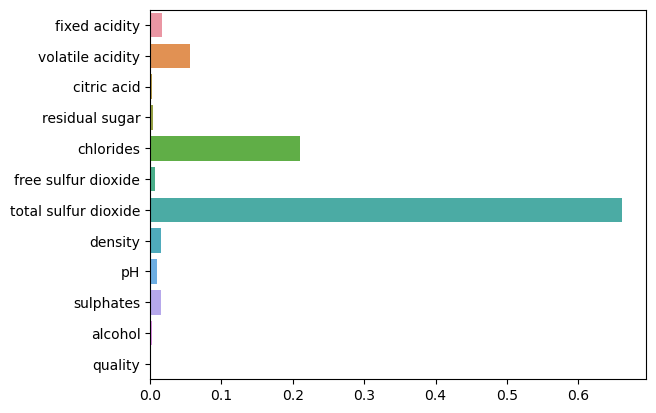

In [116]:
sns.barplot(x=model.feature_importances_, y=feature_names)

In [117]:
diff_count = abs(y_test - y_predict).sum()
diff_count

17

In [118]:
(len(y_test) - diff_count) / len(y_test) * 100

98.6923076923077

In [119]:
# 미리 구현된 알고리즘으로 예측 정확도를 구하기
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)*100

98.6923076923077

In [120]:
model.score(X_test, y_test) * 100

98.6923076923077